In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [4]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion', 'hack_license',
                          'passenger_count', 
                          'payment_type',
                          'tip_amount', 
                          'fare_amount'])

df.head()

,medallion,hack_license,passenger_count,payment_type,fare_amount,tip_amount
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,1,CRD,6.0,1.0
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,1,CRD,5.5,3.0
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,1,CRD,15.0,2.0
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,1,CRD,14.0,2.9
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,1,CRD,12.0,2.0


In [ ]:
# function for formatting and shortening big numbers
# https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings

def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])
    

# How are passengers per trip, payment type, fare and tip amounts distributed?

## Passengers per trip

In [12]:
df['passenger_count'].value_counts().sort_index().reset_index()

,passenger_count,count
0,1,9828649
1,2,1983335
2,3,607797
3,4,293847
4,5,772212
5,6,548210


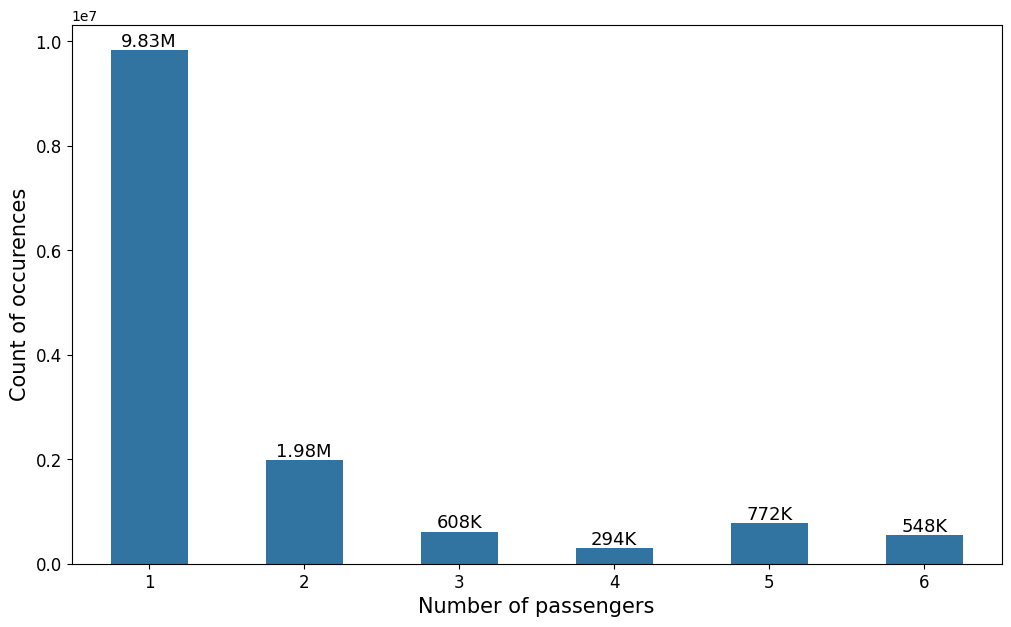

In [29]:
data_for_plot = df['passenger_count'].value_counts().sort_index().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.barplot(x="passenger_count",
            y='count',
            data=data_for_plot, 
            fill=True,
            gap=0.01,
           width=0.5)
           
bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f"{human_format(value)}" for value in bars_0.datavalues], fontsize=13)

# bars_1 = ax.containers[1]
# ax.bar_label(bars_1, labels=[f"{int(value)}" for value in bars_1.datavalues], fontsize=13)

# plt.ylim(0, 10000000)  # Set the y-axis limits from 0 to n

# ax.axes.set_title("Counts of half time deficit categories in the URC from 21/22 to 24/25 6th round",fontsize=20)
ax.set_xlabel("Number of passengers",fontsize=15)
ax.set_ylabel("Count of occurences",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

# plt.legend(fontsize='xx-large')

plt.show()

# Payment type

In [23]:
df['payment_type'].value_counts().sort_index().reset_index()

,payment_type,count
0,CRD,7804282
1,CSH,6144404
2,DIS,7967
3,NOC,25594
4,UNK,51803


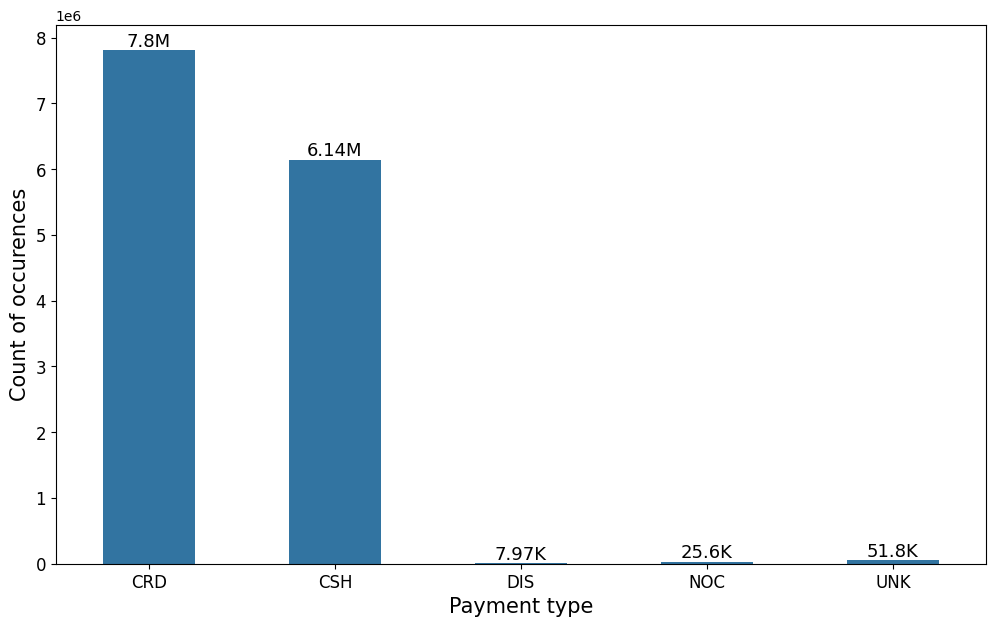

In [30]:
data_for_plot = df['payment_type'].value_counts().sort_index().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.barplot(x="payment_type",
            y='count',
            data=data_for_plot, 
            # order=['1 try down', '2 tries down', '3 tries down', '4+ tries down'],
            fill=True,
            gap=0.01,
           width=0.5)
           
bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f"{human_format(value)}" for value in bars_0.datavalues], fontsize=13)

# ax.axes.set_title("Counts of half time deficit categories in the URC from 21/22 to 24/25 6th round",fontsize=20)
ax.set_xlabel("Payment type",fontsize=15)
ax.set_ylabel("Count of occurences",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

# plt.legend(fontsize='xx-large')

plt.show()

# Fare

In [33]:
df['fare_amount'].value_counts().sort_index().reset_index()

,fare_amount,count
0,2.50,20236
1,3.00,52394
2,3.20,1
3,3.50,168395
4,4.00,332243
...,...,...
667,425.00,1
668,450.01,1
669,477.76,1
670,477.83,1


In [81]:
fare_bins = [2.49, 5, 10, 15, 20, 30, float("inf")]
fare_labels = ["$2.50-5", "$5.01-10", "$10.01-15", "$15.01-20", "$20.01-30", "$30.01+"]

df["fare_binned"] = pd.cut(df['fare_amount'], bins=fare_bins, labels=fare_labels).astype(str)

df.head()

,medallion,hack_license,passenger_count,payment_type,fare_amount,tip_amount,fare_binned,tip_binned
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,1,CRD,6.0,1.0,$5.01-10,$1
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,1,CRD,5.5,3.0,$5.01-10,$2.01-3
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,1,CRD,15.0,2.0,$10.01-15,$1.01-2
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,1,CRD,14.0,2.9,$10.01-15,$2.01-3
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,1,CRD,12.0,2.0,$10.01-15,$1.01-2


In [78]:
df['fare_binned'].value_counts().sort_index().reset_index()

,fare_binned,count
0,$10.01-15,3126994
1,$15.01-20,1355974
2,$2.50-5,1650020
3,$20.01-30,992022
4,$30.01+,755764
5,$5.01-10,6153276


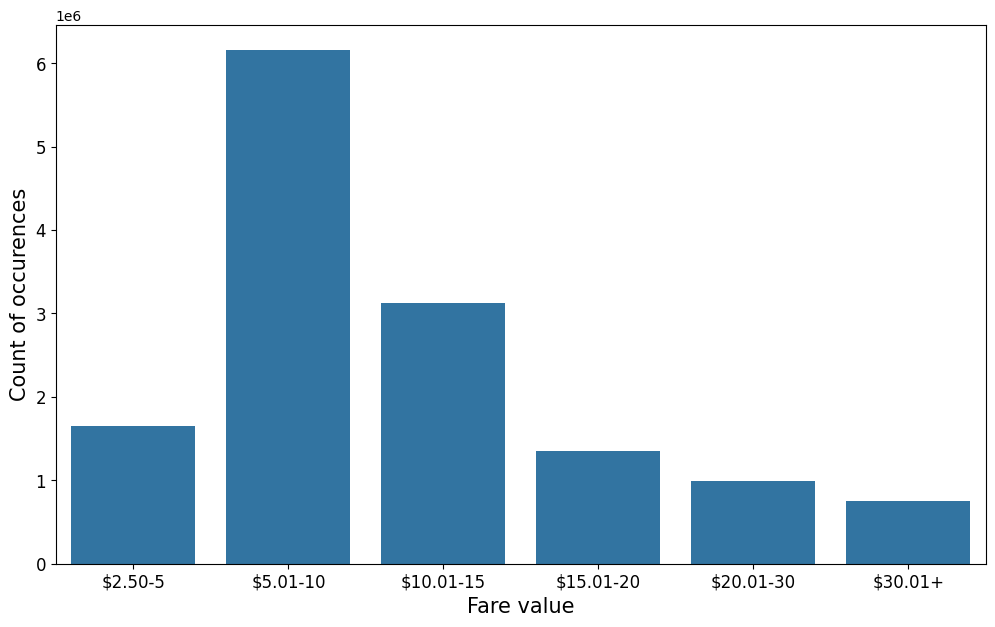

In [82]:
data_for_plot = df['fare_binned'].value_counts().sort_index().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.barplot(x="fare_binned",
            y='count',
            data=data_for_plot,
            order=fare_labels
             )
# ax.axes.set_title("Counts of half time deficit categories in the URC from 21/22 to 24/25 6th round",fontsize=20)
ax.set_xlabel("Fare value",fontsize=15)
ax.set_ylabel("Count of occurences",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

# plt.legend(fontsize='xx-large')

plt.show()

# Tipping

In [57]:
df['tip_amount'].value_counts().sort_index().reset_index()

,tip_amount,count
0,0.00,6419467
1,0.01,4182
2,0.02,1470
3,0.03,530
4,0.04,239
...,...,...
3039,166.87,1
3040,180.80,1
3041,185.00,1
3042,190.23,1


In [90]:
tip_bins = [-.01, 0, 0.99, 1, 2, 3, 5, float("inf")]
tip_labels = ["$0", "$0.01-0.99", "$1", "$1.01-2", "$2.01-3", "$3.01-5", "$5.01+"]

df["tip_binned"] = pd.cut(df['tip_amount'], bins=tip_bins, labels=tip_labels).astype(str)

df.head()

,medallion,hack_license,passenger_count,payment_type,fare_amount,tip_amount,fare_binned,tip_binned
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,1,CRD,6.0,1.0,$5.01-10,$1
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,1,CRD,5.5,3.0,$5.01-10,$2.01-3
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,1,CRD,15.0,2.0,$10.01-15,$1.01-2
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,1,CRD,14.0,2.9,$10.01-15,$2.01-3
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,1,CRD,12.0,2.0,$10.01-15,$1.01-2


In [91]:
df[df['tip_amount']==1.01]

,medallion,hack_license,passenger_count,payment_type,fare_amount,tip_amount,fare_binned,tip_binned
35024,92D7FF81CD37D82452D61218041CF280,EF4ADCAA838227E202DA5EB78F168AA3,2,CRD,7.0,1.01,$5.01-10,$1.01-2
39438,BCEB2F048FCA6F2DB11E275E6B892E15,5735FE2E3DC1CE2FC5DDA20579E1FD18,1,CRD,5.0,1.01,$2.50-5,$1.01-2
44378,C98DA9CA435B3383640C2CF6839381D5,E4018E32E5F4F3C25B2210E9F463D254,1,CRD,7.0,1.01,$5.01-10,$1.01-2
70153,D563F5CC514A8754150214749DC69373,03FDF6D5A6377FAEDC0C5C056DA3AEEB,1,CRD,6.5,1.01,$5.01-10,$1.01-2
92365,B9914F497714FE9BB289E3B497D36A58,3CEDFBF0E34FE459927147E1B3C14517,1,CRD,8.0,1.01,$5.01-10,$1.01-2
...,...,...,...,...,...,...,...,...
13948207,EB41562F6ECB5CA2630A85A1682D57FE,5545B3F8E33EA6897273849CB7868D4D,6,CRD,7.5,1.01,$5.01-10,$1.01-2
13960515,6DFFB181BDDA9971FD2BBC638B4BBD4B,E7AE89148DDE3D1E3E07E991B95DB550,1,CRD,9.5,1.01,$5.01-10,$1.01-2
13964627,18C4DF96F5A69E35952134948DB94424,241CEE1A711DCD92AEEBA2767F2C0262,1,CRD,5.5,1.01,$5.01-10,$1.01-2
14004015,42FF2B1840E92C89FEE2E64FEDF8992C,895F9C541258B1B18B8EDD4756A845F0,5,CRD,6.0,1.01,$5.01-10,$1.01-2


In [92]:
df['tip_binned'].value_counts().sort_index().reset_index()

,tip_binned,count
0,$0,6419467
1,$0.01-0.99,228614
2,$1,1262045
3,$1.01-2,2834270
4,$2.01-3,1543147
5,$3.01-5,1060328
6,$5.01+,686179


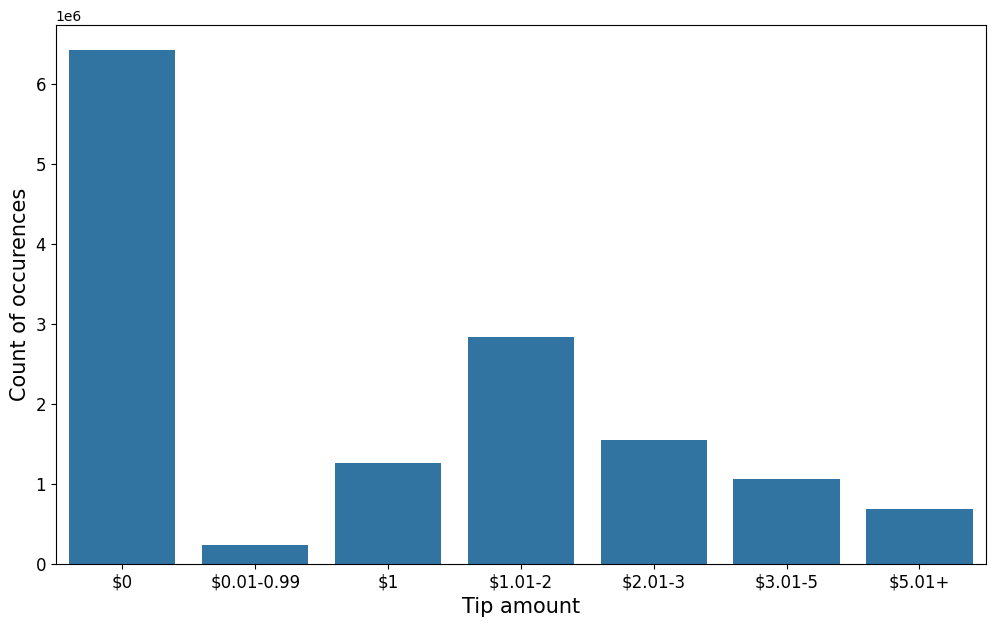

In [93]:
data_for_plot = df['tip_binned'].value_counts().sort_index().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.barplot(x="tip_binned",
            y='count',
            data=data_for_plot,
            order=tip_labels
             )
# ax.axes.set_title("Counts of half time deficit categories in the URC from 21/22 to 24/25 6th round",fontsize=20)
ax.set_xlabel("Tip amount",fontsize=15)
ax.set_ylabel("Count of occurences",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

# plt.legend(fontsize='xx-large')

plt.show()